In [15]:
library(stringr)
library('pheatmap')
library('RColorBrewer')

setwd('/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment')
nms =read.table("scrna_gene_ranks/clusters_rank_genes_names.txt", header=T, row.names=1, sep="\t")
geneinfo = read.table('/nfs/lab/publicdata/gencode_v19/gene_info.tsv', header=T)

dict = setNames(object = geneinfo$gene_name, nm = str_split_fixed(geneinfo$gene_id, "\\.",2)[,1])
genetab = apply(nms,2,function(x) dict[x])

lfc  = read.table("scrna_gene_ranks/clusters_rank_genes_logfoldchanges.txt", header=T, sep="\t")
pv   = read.table("scrna_gene_ranks/clusters_rank_genes_pvals.txt", header=T, sep="\t")
padj = read.table("scrna_gene_ranks/clusters_rank_genes_pvals_adj.txt", header=T, sep="\t")

colnames(genetab)[2]<-"t"
colnames(padj)[2]<-"t"
colnames(lfc)[2]<-"t"

tfs=rev(readLines("tf_list_plot"))

rankMat = matrix(NA, ncol = 4, nrow = length(tfs))
colnames(rankMat) = c( 'b',  'mono', 'nk', 't')
rownames(rankMat) = tfs
rankMat2 = rankMat
ft = list()
cellspec = list()
for( cellt in c( 'b',  'mono', 'nk', 't')){

bino =read.csv(sprintf("summary_tables/%s.binotest_motifs.csv",cellt))
bino = merge (bino, data.frame(X= genetab[,cellt], padj_gene= padj[,cellt], logFC = lfc[,cellt]), by="X", all.x=T)
bino=bino[order(bino$fdr),]
write.csv(bino,sprintf("summary_tables/%s.compare_rna.csv",cellt), row.names=F)
ft[[cellt]]<-fisher.test(table(bino$fdr<0.05, bino$padj_gene<0.05& bino$logFC>0))[c('p.value','estimate' )]
binos = subset(bino, fdr<0.05)
df = data.frame(motif = rank(binos$fdr), gene=rank(-binos$logFC) )
df$gene[binos$padj_gene >0.05 & binos$logFC <0 ]<-NA
rownames(df)= binos$X


pheatmap(df, cluster_rows = F, cluster_cols = F,cellwidth = 10, cellheight = 10,
         file=paste0(cellt, ".compare_gene_exp.pdf"),
         col=rev(colorRampPalette( brewer.pal(9, "YlGnBu") )(26)))
  
    
    rankMat[,cellt] =  bino$padj_gene[match(tfs, bino$X )] 
    rankMat2[,cellt] =  bino$logFC[match(tfs, bino$X )] 
    
    cellspec [[cellt]]<-subset(binos, padj_gene<0.05 & logFC>1)$X
    
    }

In [2]:
ft

$b
$b$p.value
[1] 0.2554306

$b$estimate
odds ratio 
  2.285465 


$mono
$mono$p.value
[1] 4.565467e-05

$mono$estimate
odds ratio 
  2.839248 


$nk
$nk$p.value
[1] 0.01209335

$nk$estimate
odds ratio 
  4.637175 


$t
$t$p.value
[1] 0.4508561

$t$estimate
odds ratio 
 0.5228895

In [3]:
lapply(cellspec, paste, collapse=", ")

$b
[1] "SPIB, IRF4"

$mono
[1] "ETV6, SPI1, ETV7, FLI1, JUND, GABPA, CEBPA, FOS, ETS2, CEBPB, CEBPD, FOSB, FOSL1, FOSL2, CEBPG, IRF1, STAT2, NFE2, IRF2, MAFG, IRF8, ETV5, ELK3, CREB5, IRF5, ATF7, CEBPE, STAT1, JDP2, BACH1, MAFK, USF1"

$nk
[1] "RUNX3, TBX21"

$t
[1] "ETS1, RUNX2, RUNX3"

In [4]:
foldchangeranks = apply(rankMat2,2,function(x) rank(-x))

In [5]:
foldchangeranks[rankMat>0.1]<-NA

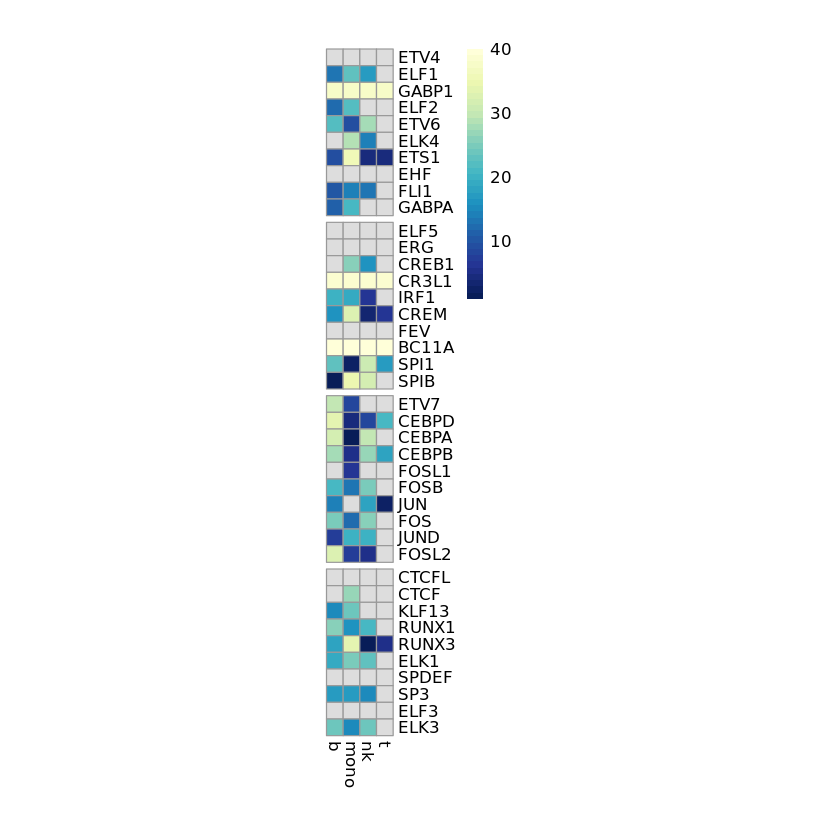

In [6]:
pheatmap (foldchangeranks,cluster_rows = F, cluster_cols = F,cellwidth = 10, cellheight = 10,
          gaps_row = c(10,20,30),
#file ="../figures/pheatmap_motifs_manual.pdf",
          col=rev(colorRampPalette( brewer.pal(9, "YlGnBu") )(40)))

In [13]:
bindo=bino[,]
for( cellt in c( 'b',  'mono', 'nk', 't')){
bino =read.csv(sprintf("summary_tables/%s.compare_rna.csv",cellt))
bindo = cbind( bindo, bino)
    }

In [14]:
write.csv(bindo[,-(1:9)], "all_tab.csv")

In [6]:
getwd()

[1] "/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment"